In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns
import pandas as pd
from scipy import signal
from importlib import reload

import winsound as sd
import pickle
import sys
import os

In [2]:
# load
cd = os.getcwd()
path = os.path.dirname(cd)

In [3]:
with open(path+'//Data_final16-CA3.pkl', 'rb') as file:
    Filt_idata = pickle.load(file)
    Filt_gdata = pickle.load(file)
    Filt_glen = pickle.load(file)
    F_DataLen = pickle.load(file)
    
    Af_py = pickle.load(file)
    Af_in = pickle.load(file)
    
    In_py_list = pickle.load(file)
    In_in_list = pickle.load(file)

In [4]:
path_results = '//module//Results_dpp_v2'

In [5]:
def calculate_success(CA3_R_list, CA1_R_list, CA3, Data, CN):
    Trial = 20
    Trial_CA3 = np.zeros(Trial)
    Trial_CA1 = np.zeros(Trial)
    Inter_CA1 = np.zeros(Trial)
    # CA3 firing rate
    N = 3
    # CA3 firing ratio
    R = 0.3
    Success = 0
    S_list = []
    Weird = 0
    Interference = 0
    Fail = 0
    Classify_num = CN
    Winner = np.zeros(Classify_num)

    # 각 trial 에서 CA3의 firing rate N 보다 큰 애들 인덱스
    # 각 엔그램이랑 겹치는 정도 R
    for i, comp in enumerate(CA3_R_list):
        temp = np.where(comp >= N)[0]
        # firing neuron과 target engram과의 overlap 정도 비교
        # 어느 하나로 수렴했으면 +1
        # 여러 엔그램으로 수렴했으면 1< 일 것
        for j, ca3 in enumerate(CA3):
            if len(set(temp).intersection(set(ca3)))/len(ca3) >= R:
                Trial_CA3[i] += 1

    # 각 trial 에서 CA1의 firing rate 1보다 큰 애들 인덱스
    # 특정 인풋이랑 완전히 일치해야만 성공
    for i, comp in enumerate(CA1_R_list):
        # 일단 발화했으면 다 체크
        temp = np.where(comp >= 1)[0]
        # 그리고 최종적으로 발화한 애들이 2보단 많이 발화해야함
        temp2 = np.where(comp >= 2)[0]
        
        for j, data in enumerate(Data):
            # 일단 발화한 애들이 어떤 data로 수렴했고
            if len(temp) == len(data) and len(set(temp).intersection(set(data))) == len(temp):
                # 얘네가 충분히 rate가 크다면 +1
                if len(temp) == len(temp2):
                    Trial_CA1[i] += 1
                    Winner[j] += 1
         # interference 체크. CA1이 발화를 아예 안했을 경우랑 구분 짓기 위해.
        if len(set(temp2)) !=0:
            Inter_CA1[i] += 1
        
    for n in range(Trial):
        if Trial_CA1[n] == 1:
            Success += 1
            S_list.append(1)
        # CA3에서 여러 engram이 발화하면서 성공도 못했을 때
        # 여러 engram이 발화했어도 CA1에 영향없으면 괜찮기 때문
        elif Inter_CA1[n] != 0 and Trial_CA3[n] > 1:
            Interference += 1
            S_list.append(0)
        else:
            Fail += 1
            S_list.append(0)
    print('Success : ', Success)
    #print('Weird : ', Weird)
    print('Interference : ', Interference)
    print('Fail : ', Fail)
    return Success

In [6]:
# Direct pp 조사
with open('Cue_Dpp.pkl', 'rb') as file:
    Cue_DataN = pickle.load(file)

In [7]:
# Direct pp 조사
with open('Cue_Dpp_v2.pkl', 'rb') as file:
    Cue_DataY = pickle.load(file)

Sparsity_win = 5
Sample_num = 5

In [8]:
np.where(Cue_DataY[:,2+21])

(array([6, 9], dtype=int64),)

In [9]:
np.where(Cue_DataY[:,2+10+21])

(array([ 0,  1,  7, 12, 13, 15], dtype=int64),)

In [10]:
np.where(Cue_DataN[:,2+63])

(array([4, 7], dtype=int64),)

In [11]:
np.where(Cue_DataN[:,2+10+63])

(array([ 0,  1,  6, 11, 12, 15], dtype=int64),)

In [12]:
# Delete pp
for n in range(5):
    with open(path+path_results+'//Results-dppN%d.pkl' %n, 'rb') as file:
        Success = pickle.load(file)
        Fail = pickle.load(file)
        If_fail = pickle.load(file)
        Winfin = pickle.load(file)

        globals()["CA3_R_listN{}".format(n)] = pickle.load(file)
        globals()["CA1_R_listN{}".format(n)] = pickle.load(file)

In [13]:
for n in range(5):
    with open(path+path_results+'//Results-dppY_v2%d.pkl' %n, 'rb') as file:
        Success = pickle.load(file)
        Fail = pickle.load(file)
        If_fail = pickle.load(file)
        Winfin = pickle.load(file)

        globals()["CA3_R_listY{}".format(n)] = pickle.load(file)
        globals()["CA1_R_listY{}".format(n)] = pickle.load(file)

In [14]:
Target_DataN = [21, 40, 64, 77, 86]  #N
Target_DataY = [40, 77, 93, 157, 223] #Y
Repeat = 20

In [15]:
np.where(Filt_idata[:,77])

(array([ 0,  1,  4,  6,  7,  9, 11, 12, 13, 15], dtype=int64),)

In [16]:
for n, comp in enumerate(Target_DataN):
    globals()["Data_dppN{}".format(n)] = [np.where(Filt_idata[:,comp] !=0)[0]]
    globals()["CA3_dppN{}".format(n)] = [Af_py[comp]]

In [17]:
for n, comp in enumerate(Target_DataY):
    globals()["Data_dppY{}".format(n)] = [np.where(Filt_idata[:,comp] !=0)[0]]
    globals()["CA3_dppY{}".format(n)] = [Af_py[comp]]

In [18]:
N = 1
# n은 target sample
# m은 sparsity x cue sample
for n in range(5):
    for m in range(21):
        globals()["Success_Y{}_{}".format(n,m)] =  calculate_success(
        globals()["CA3_R_listY{}".format(n)][Repeat*m:Repeat*(m+1)], 
        globals()["CA1_R_listY{}".format(n)][Repeat*m:Repeat*(m+1)], 
        globals()["CA3_dppY{}".format(n)], 
        globals()["Data_dppY{}".format(n)], N)

Success_Y_temp = np.zeros((5,5))
# n은 target sample
# m은 sparsity
for n in range(5):
    for m in range(5):
        Success_temp2 = []
        if m+1 < 5:
            for k in range(5):
                Success_temp2.append(globals()["Success_Y{}_{}".format(n,5*m+k)])
        elif m+1 == 5:
            Success_temp2.append(globals()["Success_Y{}_{}".format(n,20)])
        Success_Y_temp[n,m] = np.mean(Success_temp2)
    
Success_Y = []
Success_Y_list = []
# n은 sparsity
for n in range(5):
    Success_Y.append(np.mean(Success_Y_temp[:,n]))
    Success_Y_list += list((Success_Y_temp[:,n]/Repeat)*100)

Success :  5
Interference :  0
Fail :  15
Success :  11
Interference :  0
Fail :  9
Success :  12
Interference :  0
Fail :  8
Success :  6
Interference :  0
Fail :  14
Success :  11
Interference :  0
Fail :  9
Success :  14
Interference :  0
Fail :  6
Success :  12
Interference :  0
Fail :  8
Success :  12
Interference :  0
Fail :  8
Success :  4
Interference :  0
Fail :  16
Success :  17
Interference :  0
Fail :  3
Success :  14
Interference :  0
Fail :  6
Success :  15
Interference :  0
Fail :  5
Success :  14
Interference :  0
Fail :  6
Success :  16
Interference :  0
Fail :  4
Success :  14
Interference :  0
Fail :  6
Success :  15
Interference :  0
Fail :  5
Success :  14
Interference :  0
Fail :  6
Success :  15
Interference :  0
Fail :  5
Success :  17
Interference :  0
Fail :  3
Success :  18
Interference :  0
Fail :  2
Success :  15
Interference :  0
Fail :  5
Success :  9
Interference :  0
Fail :  11
Success :  18
Interference :  0
Fail :  2
Success :  16
Interference :  0
Fa

In [19]:
N = 1
# n은 target sample
# m은 sparsity x cue sample
for n in range(5):
    for m in range(21):
        globals()["Success_N{}_{}".format(n,m)] =  calculate_success(
        globals()["CA3_R_listN{}".format(n)][Repeat*m:Repeat*(m+1)], 
        globals()["CA1_R_listN{}".format(n)][Repeat*m:Repeat*(m+1)], 
        globals()["CA3_dppN{}".format(n)], 
        globals()["Data_dppN{}".format(n)], N)

Success_N_temp = np.zeros((5,5))
# n은 target sample
# m은 sparsity
for n in range(5):
    for m in range(5):
        Success_temp2 = []
        if m+1 < 5:
            for k in range(5):
                Success_temp2.append(globals()["Success_N{}_{}".format(n,5*m+k)])
        elif m+1 == 5:
            Success_temp2.append(globals()["Success_N{}_{}".format(n,20)])
        Success_N_temp[n,m] = np.mean(Success_temp2)
    
Success_N = []
Success_N_list = []
# n은 sparsity
for n in range(5):
    Success_N.append(np.mean(Success_N_temp[:,n]))
    Success_N_list += list((Success_N_temp[:,n]/Repeat)*100)

Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  15
Interference :  0
Fail :  5
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  14
Interference :  0
Fail :  6
Success :  0
Interference :  0
Fail :  20
Success :  12
Interference :  0
Fail :  8
Success :  0
Interference :  0
Fail :  20
Success :  0
Interference :  0
Fail :  20
Success :  1
Interference :  0
Fai

N = 1
for n in range(2):
    for m in range(21):
        globals()["Success_N{}_{}".format(2*n+1,m)] =  calculate_success(
        globals()["CA3_R_listN{}".format(2*n+1)][Repeat*m:Repeat*(m+1)], 
        globals()["CA1_R_listN{}".format(2*n+1)][Repeat*m:Repeat*(m+1)], 
        globals()["CA3_dpp{}".format(2*n+1)], 
        globals()["Data_dpp{}".format(2*n+1)], N)

# n : sample num / m,k : sparsity num
Success_N_temp = np.zeros((5,5))
for n in range(5):
    for m in range(5):
        Success_temp2 = []
        if m+1 < 5:
            for k in range(5):
                Success_temp2.append(globals()["Success_N{}_{}".format(1,5*m+k)])
        elif m+1 == 5:
            Success_temp2.append(globals()["Success_N{}_{}".format(1,20)])
    Success_N_temp[n,m] = np.mean(Success_temp2)
    
Success_N = []
Success_N_list = []
for n in range(5):
    Success_N.append(np.mean(Success_N_temp[:,n]))
    Success_N_list += list((Success_N_temp[:,n]/Repeat)*100)

In [20]:
len(Success_N_list)

25

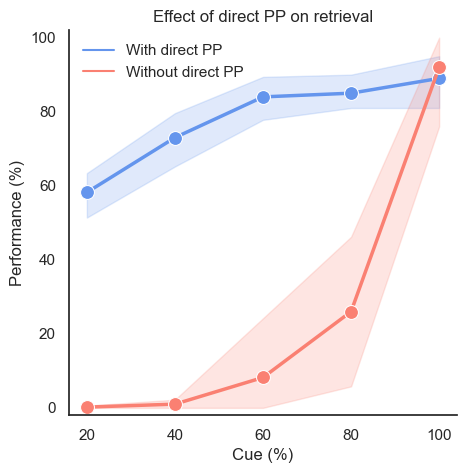

In [24]:
data_dic = {}
data_dic['Cue (%)'] = []
# cue percent * type
for n in range(5*2):
    m = (n % 5)+1
    data_dic['Cue (%)'] += [20*m,20*m,20*m,20*m,20*m]
data_dic['With direct PP / Without direct PP'] = []
for n in range(5*5):
    data_dic['With direct PP / Without direct PP'].append('With direct PP')
for n in range(5*5):
    data_dic['With direct PP / Without direct PP'].append('Without direct PP')

data_dic['Performance (%)'] = Success_Y_list+Success_N_list

df = pd.DataFrame(data_dic)

fig = plt.subplot(111)
sns.set(rc={'figure.figsize':(5, 5)})
sns.set_theme(style='white')
ax = sns.lineplot(data = df, x='Cue (%)', y='Performance (%)', marker='o', markersize=10, palette={'With direct PP':'cornflowerblue','Without direct PP':'salmon'}, hue=df['With direct PP / Without direct PP'], linewidth=2.5)
plt.ylim([-2,102])
plt.xlabel('Cue (%)')
plt.ylabel('Performance (%)')
plt.title('Effect of direct PP on retrieval')
plt.legend(loc='upper left', frameon=False)
fig.spines['top'].set_visible(False)
fig.spines['right'].set_visible(False)
plt.savefig('Fig-dpp.pdf', bbox_inches='tight')
plt.savefig('Fig-dpp.tiff', bbox_inches='tight', dpi=300)
plt.show()

In [22]:
a

NameError: name 'a' is not defined